In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from sklearn.decomposition import PCA


In [2]:
dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"

In [3]:
flies = ['fly_087', 'fly_089', 'fly_094', 'fly_095', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']

In [5]:
file = os.path.join('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201110_analysis_superfly_supervoxels', 'superslice_20.nii')
superslice = np.array(nib.load(file).get_data(), copy=True)

In [6]:
superslice.shape

(256, 128, 3384, 10)

In [10]:
loadings = {}
spatial = {}
for i,fly in enumerate(flies):
    print(fly)
    X = superslice[:,:,:,i].reshape(-1,superslice.shape[-2]).T
    t0 = time.time()
    pca = PCA().fit(X)
    pca_scores = pca.components_
    pca_loadings = pca.transform(X)
    pca_spatial = np.reshape(pca_scores, (-1,256,128))
    loadings[fly] = pca_loadings
    spatial[fly] = pca_spatial
    print('PCA duration: {}'.format(time.time()-t0))

fly_087
PCA duration: 85.00596404075623
fly_089
PCA duration: 86.73559522628784
fly_094
PCA duration: 86.19154596328735
fly_095
PCA duration: 86.38835406303406
fly_097
PCA duration: 87.85634970664978
fly_098
PCA duration: 82.94886112213135
fly_099
PCA duration: 88.22938299179077
fly_100
PCA duration: 87.82803344726562
fly_101
PCA duration: 89.72085475921631
fly_105
PCA duration: 88.99624133110046


In [11]:
spatial['fly_087'].shape

(3384, 256, 128)

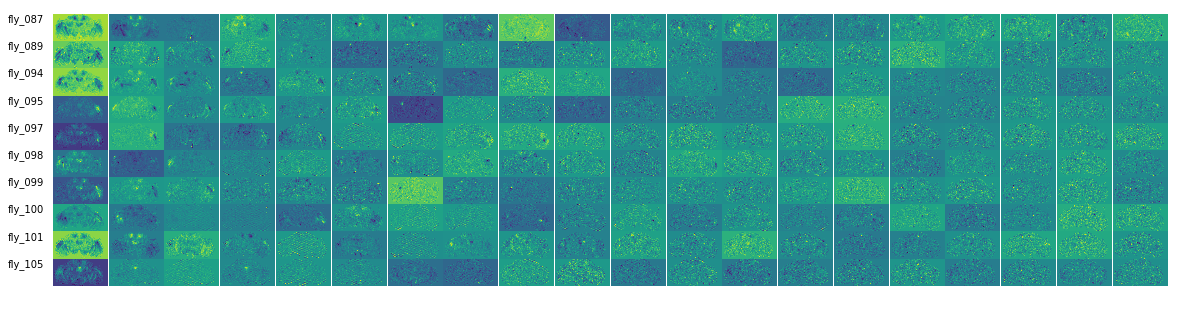

In [43]:
fig = plt.figure(figsize=(20,5))
for i, fly in enumerate(flies):
    for pc in range(20):
        #plt.subplot(10,20,(i+1)+pc*10)
        plt.subplot(10,20,(pc+1)+(i*20))
        plt.imshow(spatial[fly][pc,:,:].T)
        plt.axis('off')
        if pc == 0:
            plt.title(fly,fontsize=10,x=-.5,y=.5)
        plt.subplots_adjust(wspace=0, hspace=0)

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')
#each column is a fly, each row is a PC

In [3]:
t0 = time.time()
directory = os.path.join(dataset_path, 'fly_094','func_0', 'pca', '20200922_on_high_pass_masked')
file = os.path.join(directory, 'scores_(spatial).npy')
pca_spatial = np.load(file)
file = os.path.join(directory, 'loadings_(temporal).npy')
pca_loadings = np.load(file)
#pca_spatial.shape = (4554, -1)
#pca_spatial.shape = (4554, 128, 84, 49)
print('Duration: {}'.format(time.time()-t0))

Duration: 22.26410174369812


In [4]:
fly = "fly_094"
directory = os.path.join(dataset_path,fly,'func_0')
brain_file = os.path.join(directory, 'brain_zscored_green_high_pass_masked.nii')
brain = np.array(nib.load(brain_file).get_data(), copy=True)

In [6]:
brain.shape

(256, 128, 49, 3384)

In [35]:
t0 = time.time()
X = brain[:,:,35,:].reshape(-1,brain.shape[-1]).T
#brain = None
print('X is time by voxels {}'.format(X.shape))
print('Reshape duration: {}'.format(time.time()-t0))

t0 = time.time()
pca = PCA().fit(X)
pca_scores = pca.components_
print('Scores is PC by voxel {}'.format(pca_scores.shape))
pca_loadings_ = pca.transform(X)
print('Loadings is time by PC {}'.format(pca_loadings_.shape))
pca_spatial_ = np.reshape(pca_scores, (-1,256,128))
print('Spatial is {}'.format(pca_spatial_.shape))
print('PCA duration: {}'.format(time.time()-t0))

X is time by voxels (3384, 32768)
Reshape duration: 3.347663640975952
Scores is PC by voxel (3384, 32768)
Loadings is time by PC (3384, 3384)
Spatial is (3384, 256, 128)
PCA duration: 84.0526773929596


(2000, 2500)

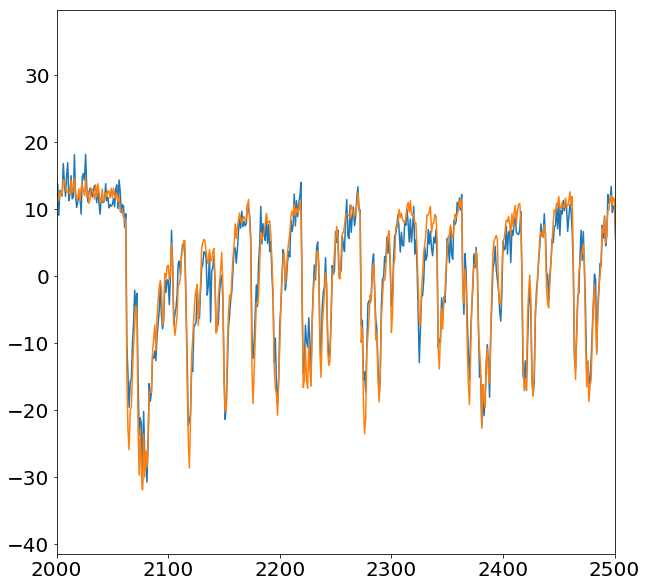

In [20]:
fig = plt.figure(figsize=(10,10))
plt.plot(pca_loadings_[:,0])
plt.plot(pca_loadings[:,0]*-.22)

#plt.plot(pca_loadings_[:,1])
#plt.plot(pca_loadings_[:,2])
#plt.plot(pca_loadings_[:,3])
#plt.plot(pca_loadings_[:,4])
#plt.plot(pca_loadings_[:,5])
#plt.plot(pca_loadings_[:,10])


plt.xlim(2000,2500)

Spatial is (3384, 256, 128)
PCA duration: 143.57164573669434


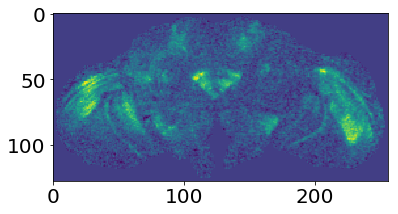

In [41]:
plt.imshow(pca_spatial_[0,:,:].T)

In [8]:
pca_spatial_.shape

(3384, 256, 128)

In [9]:
pca_spatial.shape

(3384, 256, 128, 49)

In [42]:
file = os.path.join(directory, 'pca', 'temp_20201111_single_slice_clipped.nii')
nib.Nifti1Image(np.moveaxis(pca_spatial_, 0,-1), np.eye(4)).to_filename(file)

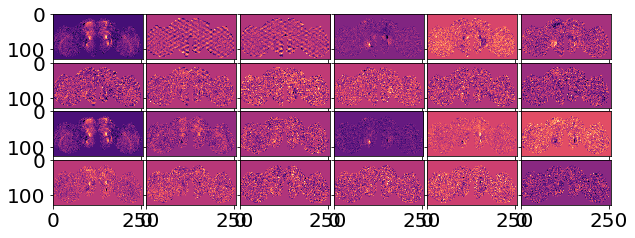

In [36]:
fig = plt.figure(figsize=(10,20))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 6), axes_pad=.05)
z=35
for i in range(12):
    grid[i].imshow(pca_spatial_[i,:,:].T,cmap='magma')
for i,j in enumerate(range(12,24)):
    grid[j].imshow(pca_spatial[i,:,:,z].T,cmap='magma')
    
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, timestr)
plt.savefig(fname,dpi=300,bbox_inches='tight')

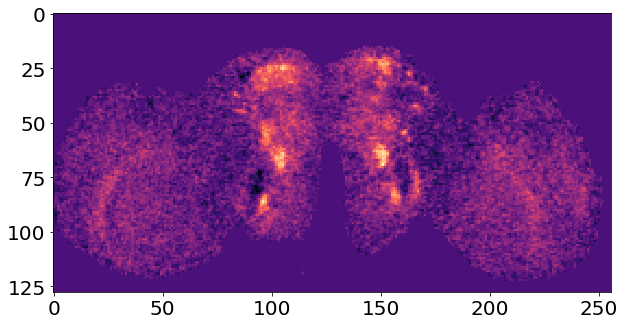

In [34]:
fig = plt.figure(figsize=(10,20))
plt.imshow(pca_spatial[0,:,:,35].T,cmap='magma')

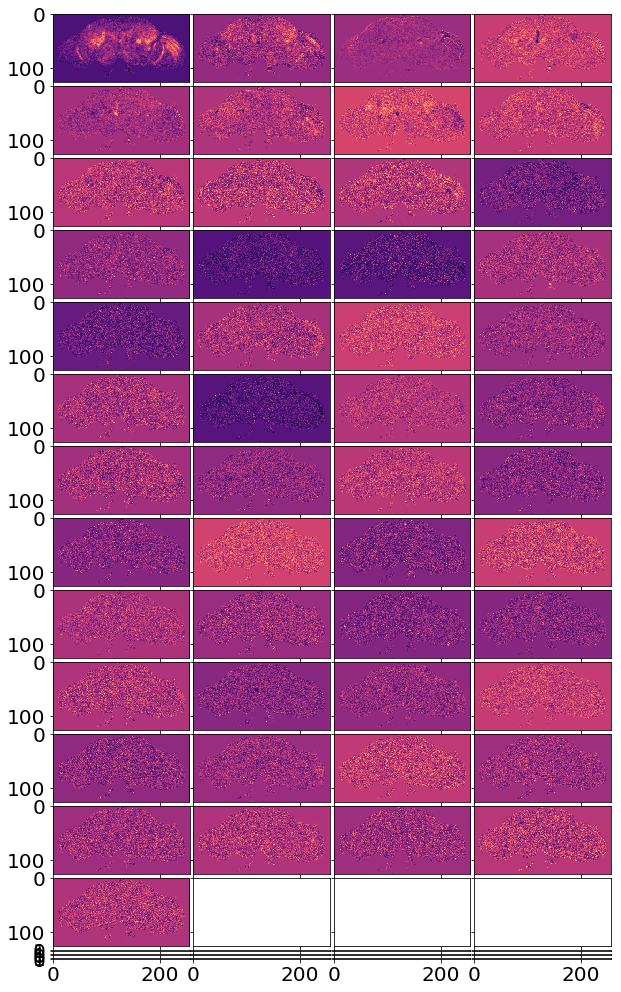

In [4]:
fig = plt.figure(figsize=(10,20))
grid = ImageGrid(fig, 111, nrows_ncols=(16, 4), axes_pad=.05)
for i in range(49):
    grid[i].imshow(pca_spatial[i,:,:,10].T,cmap='magma')